# Reto final : Plataformas de analítica

### Importación de librerías y lectura de base de datos

In [30]:
#Importamos las librerías que utilizaremos en nuestro proyecto 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
from IPython.display import display,HTML
#Se definen temas
cf.set_config_file(sharing='public',theme='pearl',offline=True) # write cf.getThemes() to find all themes available

In [31]:
#Leo mi archivo.csv
Country = pd.read_csv("CountryTable_1.csv")
Country

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Willem-Alexander,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,Jose Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the uK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqiperia,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YuG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,NaN,Jugoslavija,Federal Republic,Vojislav KoStunica,1792.0,Yu
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


### Identificación y tratamiento de nulos

In [ ]:
#Revisemos nuestra base de datos para identificar valores nulos 
valores_nulos=Country.isnull().sum()
valores_nulos
#Encontramos valores nulos en las columnas independence_year, life_expectancy, gnp_old, local_name, head_of_state, capital y code2 

In [48]:
#Realizaremos diversos métodos para reemplazar los valores nulos en las columnas indicadas

#independence_year:Se reemplazarán los nulos con el valor "1900"
Country["independence_year"]= Country["independence_year"].fillna(1900) 

#life_expectancy:Se reemplazará por el valor de la moda de la columna 
Country["life_expectancy"]= Country["life_expectancy"].fillna(value = Country["life_expectancy"].mode()[0]) 

#gnp_old:Se reemplazará por el valor de la mediana de la columna
Country["gnp_old"]= Country["gnp_old"].fillna(Country["gnp_old"].median()) 

#local_name:Se reemplazará con el string "Inexistente"
Country["local_name"]= Country["local_name"].fillna("Inexistente") 

#head_of_state:Se reemplazará con el string "Desconocido"
Country["head_of_state"]= Country["head_of_state"].fillna("Desconocido") 

#capital: Se reemplazará con el valor 0
Country["capital"]= Country["capital"].fillna(0) 

#code2: Se reemplazará con el string NA
Country["code2"]= Country["code2"].fillna("NA") 

#Comprobamos que los cambios se hayan realizado de manera satisfactoria 
Country.to_csv("Country_prueba.csv")


In [75]:
#Comprobamos que los cambios se hayan realizado de manera satisfactoria 
valores_nulos=Country.isnull().sum().sum()
valores_nulos

0

### Identificación y tratamiento de outliers

### Método 1: Distribución normal con 2 desviaciones estándar

#### Se probará con diversos métodos de identificación de outliers

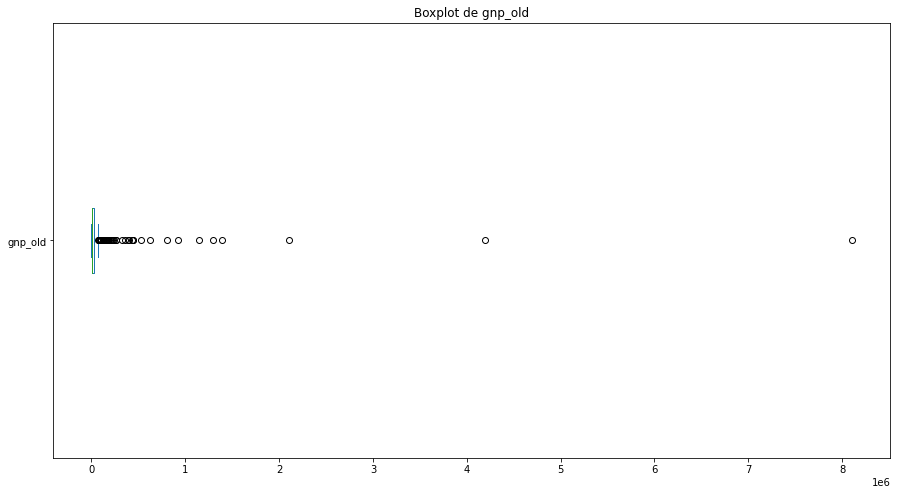

In [52]:
#El análisis de nuestra base de datos nos orienta a buscar outliers en las columnas gnp_old y population 
#gnp_old
#Realizamos diagrama de caja o bigote de cada columna del dataframe para identificar outliers
fig = plt.figure(figsize =(15, 8))
Country["gnp_old"].plot(kind='box', vert=False)
plt.title("Boxplot de gnp_old")
plt.show() 
#Se observa que existen un buen número de valores atípicos en la columna. Ahora procedemos con identificarlos


In [54]:
#Para ambas columnas utilizaremos el método de distribución normal 
#Comencemos identificando los límites superiores e inferiores de los valores de la columna gnp_old
#Utilizaremos como límite 2 desviaciones estándar 
y=Country["gnp_old"]
Limite_Superior= y.mean() + 2*y.std()
Limite_Inferior= y.mean() - 2 *y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 1375629.5313349972
Limite inferior permitido -1124761.0041383444


In [56]:
#Una vez definidos los límites, encontramos los outliers de la columna
outliers= Country[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
56,DEu,Germany,Europe,Western Europe,357022.0,1955.0,82164700,77.4,2133367.0,2102826.0,Deutschland,Federal Republic,Johannes Rau,3068.0,DE
72,FRA,France,Europe,Western Europe,551500.0,843.0,59225700,78.8,1424285.0,1392448.0,France,Republic,Jacques Chirac,2974.0,FR
109,JPN,Japan,Asia,Eastern Asia,377829.0,-660.0,126714000,80.7,3787042.0,4192638.0,Nihon/Nippon,Constitutional Monarchy,Akihito,1532.0,JP
223,uSA,united States,North America,North America,9363520.0,1776.0,278357000,77.1,8510700.0,8110900.0,united States,Federal Republic,George W. Bush,3813.0,uS


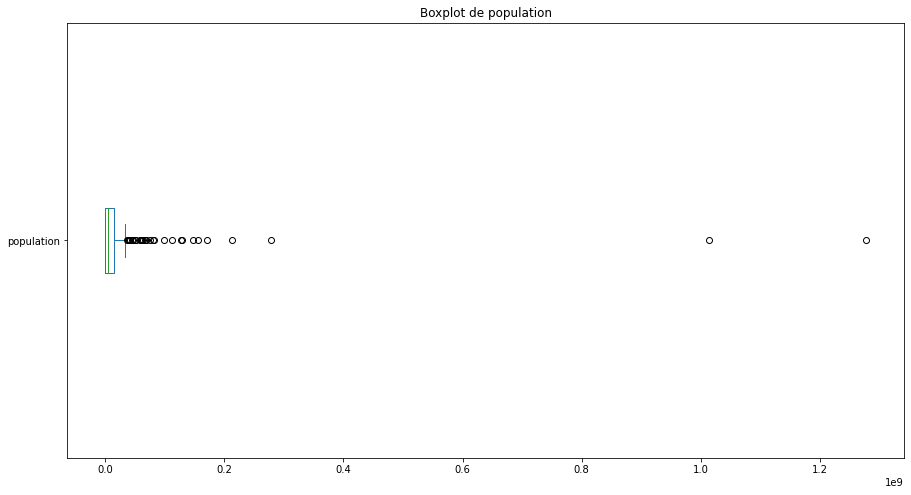

In [61]:
#Ahora efectuamos el mismo procedimiento con la columna population
#Realizamos diagrama de caja o bigote de cada columna del dataframe para identificar outliers
fig = plt.figure(figsize =(15, 8))
Country["population"].plot(kind='box', vert=False)
plt.title("Boxplot de population")
plt.show() 
#Observamos que existen un buen número de valores atípicos en la columna. Ahora procedemos con identificarlos

In [73]:
#Comencemos identificando los límites superiores e inferiores de los valores de la columna population
#Utilizaremos como límite 2 desviaciones estándar 
y1=Country["population"]
Limite_Superior_pop= y1.mean() + 2*y1.std()
Limite_Inferior_pop= y1.mean() - 2 *y1.std()
print("Limite superior permitido", Limite_Superior_pop)
print("Limite inferior permitido", Limite_Inferior_pop)

Limite superior permitido 244113732.5648982
Limite inferior permitido -193245536.33058858


In [74]:
#Una vez definidos los límites, encontramos los outliers de la columna
outliers_pop= Country[(y1>Limite_Superior_pop)|(y1<Limite_Inferior_pop)]
outliers_pop

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
41,CHN,China,Asia,Eastern Asia,9572900.0,-1523.0,1277558000,71.4,982268.0,917719.0,Zhongquo,People'sRepublic,Jiang Zemin,1891.0,CN
99,IND,India,Asia,Southern and Central Asia,3287263.0,1947.0,1013662000,62.5,447114.0,430572.0,Bharat/India,Federal Republic,Kocheril Raman Narayanan,1109.0,IN
223,uSA,united States,North America,North America,9363520.0,1776.0,278357000,77.1,8510700.0,8110900.0,united States,Federal Republic,George W. Bush,3813.0,uS


### Método 2: Rango intercuartílico con 1.3 iqr 

In [76]:
#Probemos un segundo método para identificar outliers para las columnas gnp_old, surface_area, life_expectancy, y population 
#Comencemos con la columna gnp_old
z=Country["gnp_old"]

percentile25=z.quantile(0.25) #Q1
percentile75=z.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.3*iqr
Limite_Inferior_iqr= percentile25 - 1.3*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)
#Observamos que la obtención de los límites parece más precisa utilizando este método 

Limite superior permitido 67186.0
Limite inferior permitido -32552.0


In [ ]:
#Una vez definidos los límites, ahora encontremos los outliers de la columna 
outliers_iqr= Country[(z>Limite_Superior_iqr)|(z<Limite_Inferior_iqr)]
outliers_iqr
#A pesar de que este método parece hacer un mejor trabajo identificando outliers, dependerá del  objetivo del análisis si se excluyen datos de países tan importantes

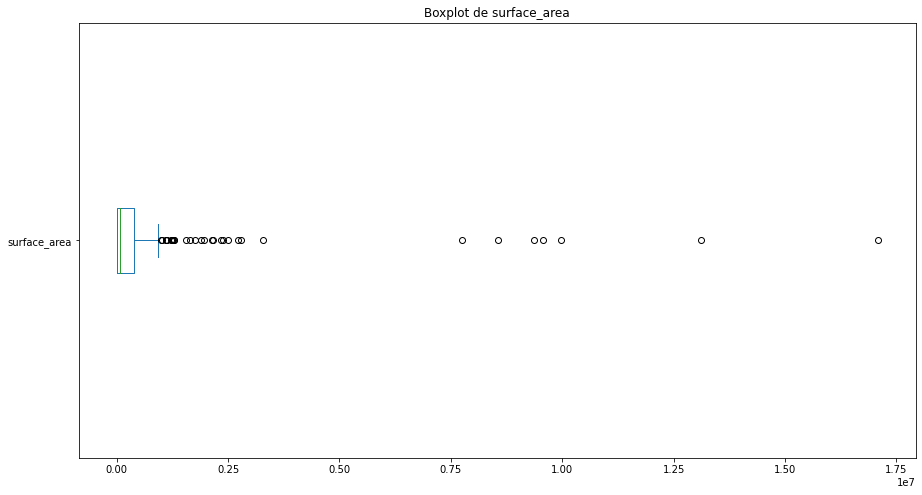

In [82]:
#Para la columna surface_area visualicemos los outliers en un diagrama de caja 
fig = plt.figure(figsize =(15, 8))
Country["surface_area"].plot(kind='box', vert=False)
plt.title("Boxplot de surface_area")
plt.show() 
#Observamos que existen un buen número de outliers en la columna que nos habla acerca de la extensión territorial 

In [78]:
#Comencemos identificando los límites superiores e inferiores de los valores de la columna surface_area
s=Country["surface_area"]

percentile25=s.quantile(0.25) #Q1
percentile75=s.quantile(0.75) #Q3
iqr_s= percentile75 - percentile25

LS_s= percentile75 + 1.3*iqr_s
LI_s= percentile25 - 1.3*iqr_s
print("Limite superior permitido", LS_s)
print("Limite inferior permitido", LI_s)

Limite superior permitido 914177.8500000001
Limite inferior permitido -513148.35000000003


In [ ]:
#Una vez definidos los límites, ahora encontremos los outliers de la columna 
outliers_s= Country[(s>LS_s)|(s<LI_s)]
outliers_s

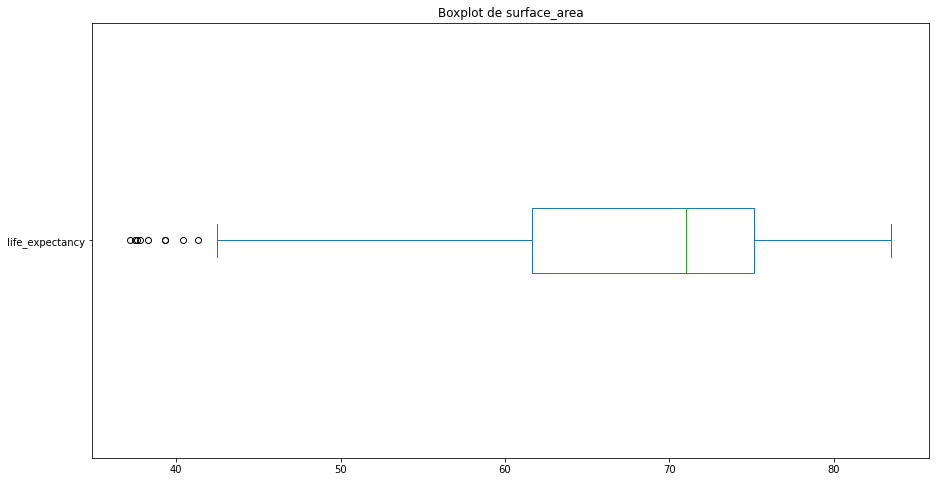

In [83]:
#Para la columna life_expectancy visualicemos los outliers en un diagrama de caja 
fig = plt.figure(figsize =(15, 8))
Country["life_expectancy"].plot(kind='box', vert=False)
plt.title("Boxplot de surface_area")
plt.show() 
#Observamos que existen outliers en la parte inferior de nuestro box plot 

In [ ]:
#Procedemos con la columna life_expectancy 
life=Country["life_expectancy"]

percentile25=life.quantile(0.25) #Q1
percentile75=life.quantile(0.75) #Q3
iqr_life= percentile75 - percentile25

LS_life= percentile75 + 1.3*iqr_life
LI_life= percentile25 - 1.3*iqr_life
print("Limite superior permitido", LS_life)
print("Limite inferior permitido", LI_life)

In [ ]:
#Una vez definidos los límites, ahora encontremos los outliers de la columna 
outliers_life= Country[(life>LS_life)|(life<LI_life)]
outliers_life
#Obtenemos los valores de expectativa de vida que habíamos visto en nuestro boxplot 

In [85]:
#Finalmente realizamos la identificación de outliers de la columna population
#Como habíamos visto anteriormente en nuestro primer boxplot, la columna tiene un buen número de outliers 
#Veamos si este método de identificación resulta una mejor opción que el de la distribución normal

pop=Country["population"]
percentile25=pop.quantile(0.25) #Q1
percentile75=pop.quantile(0.75) #Q3
iqr_pop= percentile75 - percentile25

LS_pop= percentile75 + 1.3*iqr_pop
LI_pop= percentile25 - 1.3*iqr_pop
print("Limite superior permitido", LS_pop)
print("Limite inferior permitido", LI_pop)

Limite superior permitido 34042250.0
Limite inferior permitido -18868750.0


In [ ]:
#Una vez definidos los límites, ahora encontremos los outliers de la columna 
out_pop= Country[(pop>LS_pop)|(pop<LI_pop)]
out_pop
#Observamos que a diferencia del método de distribución normal, nuestros límites con el método de rango intercuartílico son más estrechos
#Por lo que tenemos más outliers 